<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/Projects/blob/Thanuja-Gogada/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the file**


In [33]:

from google.colab import files
uploaded = files.upload()

Saving Indian_Kids_Screen_Time.csv to Indian_Kids_Screen_Time (6).csv


**Load the dataset**

Verified successful loading using df.head() and df.info().

In [25]:
from google.colab import files
uploaded = files.upload()
import pandas as pd

df = pd.read_csv(list(uploaded.keys())[0])
df.head()



Saving Indian_Kids_Screen_Time.csv to Indian_Kids_Screen_Time (5).csv


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [34]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9668 non-null   int64  
 1   Gender                             9668 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9668 non-null   float64
 3   Primary_Device                     9668 non-null   object 
 4   Exceeded_Recommended_Limit         9668 non-null   bool   
 5   Educational_to_Recreational_Ratio  9668 non-null   float64
 6   Health_Impacts                     6488 non-null   object 
 7   Urban_or_Rural                     9668 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 538.3+ KB


**Checking null values**

Used df.isnull().sum() to identify missing values in each column.

Learned that handling null values is important before applying ML models.



In [35]:
 df.isnull().sum()



,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3180
Urban_or_Rural,0


**Checking duplicate rows**

Used df.duplicated().sum() to find duplicate rows.

Understood that duplicates can lead to data bias and wrong model training.

In [39]:
df.duplicated().sum()

np.int64(0)

**Correlation matrix**

Applied df.corr() to see relationships between numerical features.

Positive correlation- one increases, the other also increases.

Negative correlation- one increases, the other decreases.

Helps in feature selection and reducing multicollinearity.

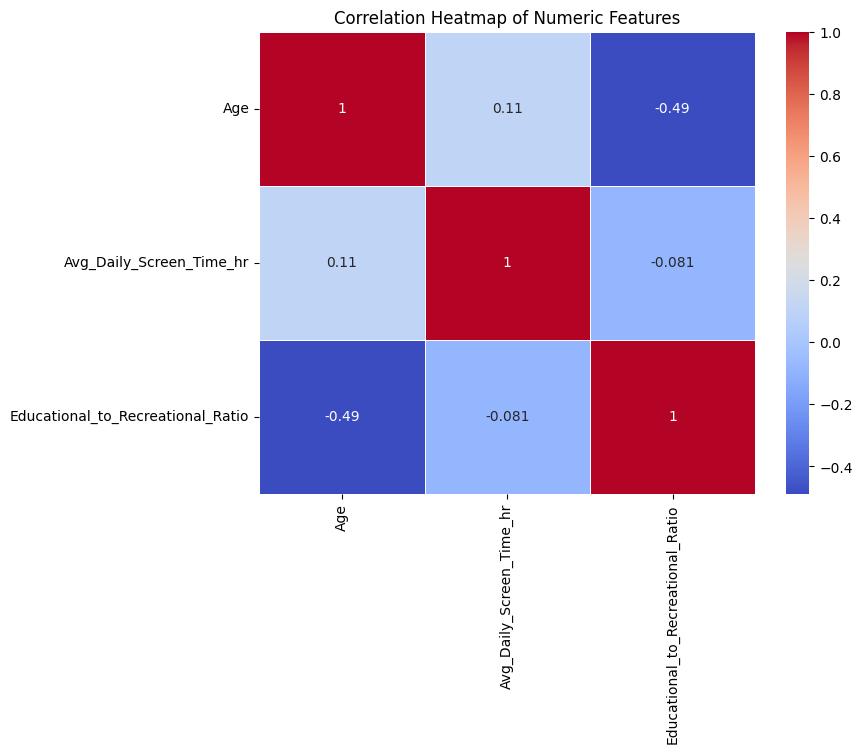

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
num_df = df.select_dtypes(include=[np.number])
corr_matrix = num_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


**Columns datatypes**


Confirmed data types with df.dtypes.

Important step because wrong datatypes (e.g., numbers stored as strings) affect analysis.



In [41]:
pd.DataFrame(df.dtypes, columns=['dtype']).reset_index().rename(columns={'index':'column'})


,column,dtype
0,Age,int64
1,Gender,object
2,Avg_Daily_Screen_Time_hr,float64
3,Primary_Device,object
4,Exceeded_Recommended_Limit,bool
5,Educational_to_Recreational_Ratio,float64
6,Health_Impacts,object
7,Urban_or_Rural,object


IQR

Applied Interquartile Range (IQR) method to detect outliers.

Formula:

Q1 = 25th percentile, Q3 = 75th percentile

IQR = Q3 – Q1

Outlier Range = [Q1 – 1.5IQR, Q3 + 1.5IQR]

In [42]:

numerical_data = df.select_dtypes(include='number')
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1
print("Q1:\n", Q1)
print("Q3:\n", Q3)
print("IQR:\n", IQR)


Q1:
 Age                                  10.0000
Avg_Daily_Screen_Time_hr              3.4275
Educational_to_Recreational_Ratio     0.3700
Name: 0.25, dtype: float64
Q3:
 Age                                  16.00
Avg_Daily_Screen_Time_hr              5.38
Educational_to_Recreational_Ratio     0.48
Name: 0.75, dtype: float64
IQR:
 Age                                  6.0000
Avg_Daily_Screen_Time_hr             1.9525
Educational_to_Recreational_Ratio    0.1100
dtype: float64
